# Creating and Applying a 2D Filter

## **Import resources and display image**

### **numpy** is a package for scientific computing in python, and has objects and routines for various mathematical operations.

### **cv2** is the opencv2 library, which includes many operations for computer vision.

### **skimage** is the sci-kit library for image processing.

### **placekitten.com** is a web site that has a lot of pictures of kittens.

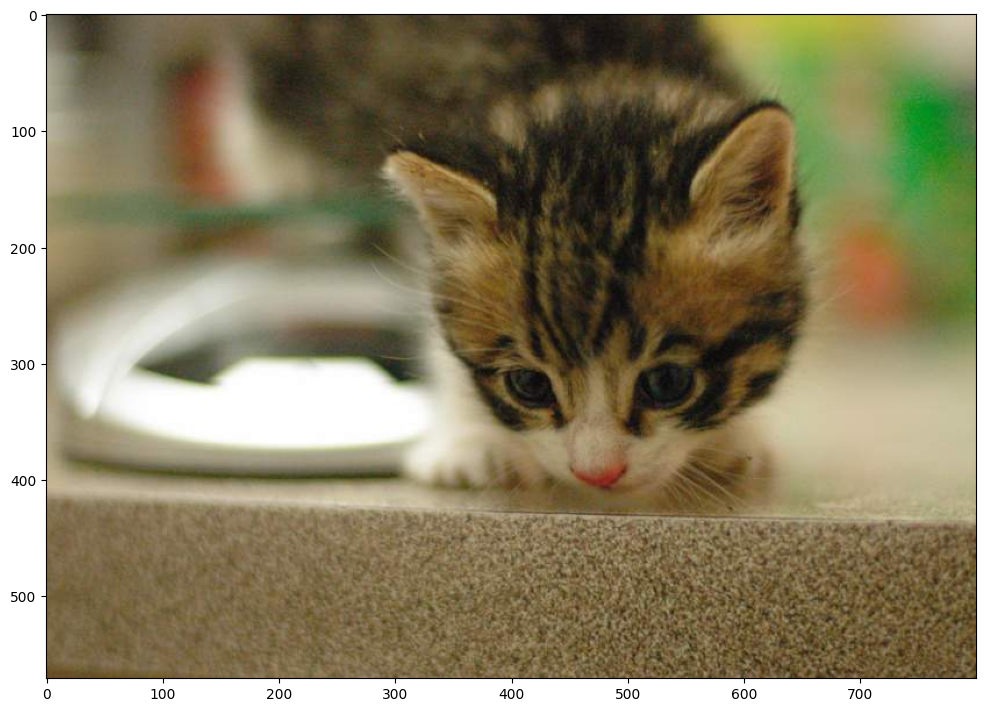

In [1]:
import matplotlib.pyplot as plt
from skimage import io
import cv2
import numpy as np

%matplotlib inline
# Read in the image
image = io.imread("https://placekitten.com/800/571")

plt.figure(figsize=(12,16))
plt.imshow(image)

### Convert the image to grayscale

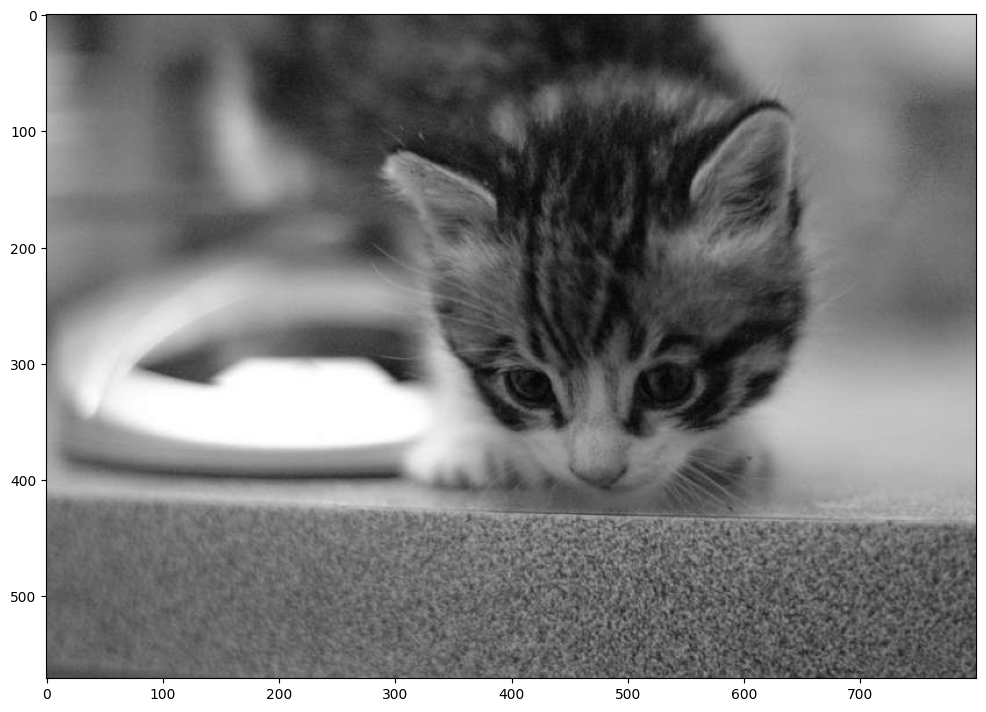

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12,16))
plt.imshow(gray, cmap='gray')

### Create a filter kernel

### Make a small 2D array to hold the filter coefficients.
### Let's first make a filter to emphasize changes in the horizontal direction.

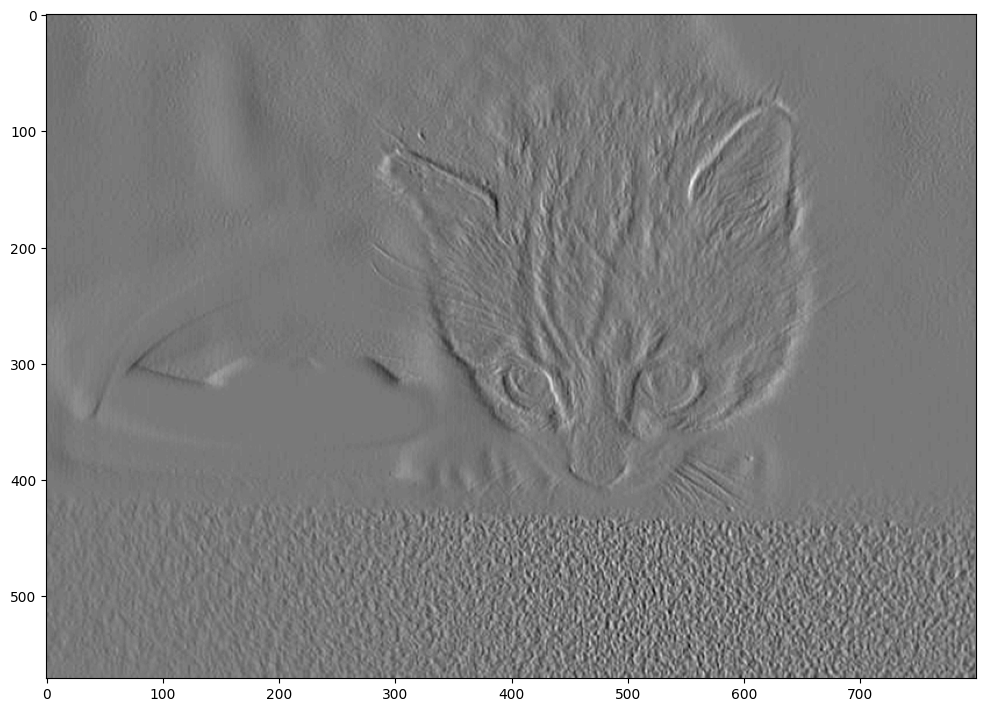

In [3]:
# Create a custom kernel

# 3x3 array for edge detection
x_difference_kernel = np.array([[ -1, 0, 1], 
                                [ -2, 0, 2], 
                                [ -1, 0, 1]])/(9)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
# here we filter multiple times (what is the effect of this?)
x_difference = cv2.filter2D(gray, cv2.CV_16S, x_difference_kernel)

plt.figure(figsize=(12,16))
plt.imshow(x_difference, cmap='gray')


## Then make a filter to emphasize changes in the vertical direction.

In [ ]:
y_difference_kernel = np.array([[ 1, 2, 1], 
                                [ 0, 0, 0], 
                                [ -1, -2, -1]])/(9)

y_difference = cv2.filter2D(gray, cv2.CV_16S, y_difference_kernel)

plt.figure(figsize=(12,16))
plt.imshow(y_difference, cmap='gray')

### To combine the two filtered outputs into a single image, we can treat the two image pixels values as the components of a vector and compute the magnitude of this vector. This vector can be interpreted as an approximation to the spatial gradient vector of the original image.

In [ ]:
gradient_magnitude = np.sqrt((y_difference * y_difference) + (x_difference * x_difference))
plt.figure(figsize=(12,16))
plt.imshow(gradient_magnitude, cmap='gray')


### We can also compute the direction of the vector, by taking the arctangent of the y-component of the gradient divided by the x-component. Here we use a false color scale to represent the angle values.

In [ ]:
gradient_angle = np.arctan2(y_difference,x_difference) * 180 / np.pi
plt.figure(figsize=(12,16))
plt.imshow(gradient_angle, cmap='hsv')

### The gradient angle image is very busy, as even the regions with very small magnitudes are given a value. 
### So, we generate a binary mask image which indicates those pixels for which the gradient magnitude is large.

In [ ]:
ret,gradient_threshold = cv2.threshold(gradient_magnitude,6,255,cv2.THRESH_BINARY)
plt.figure(figsize=(12,16))
plt.imshow(gradient_threshold, cmap='gray')

### We can use this mask to set all of the low gradient magnitude pixel angle values to zero. This gives a cleaner looking gradient direction image.

In [ ]:
masked_gradient_angle = gradient_angle * gradient_threshold / 255
plt.figure(figsize=(12,16))
plt.imshow(masked_gradient_angle, cmap='hsv')